In [1]:
import numpy as np
import pandas as pd
import os
import pickle

In [24]:
# !pip install apache-beam

In [2]:
import apache_beam as beam

In [13]:
url = "https://www.ncei.noaa.gov/data/local-climatological-data/access/"
years = [2001] #Change years required accordingly
## SELECT NUMBER OF STATIONS YOU NEED TO FETCH DATA
num_stations = 25 ## Change as required
required_fields = ['DATE','HourlyWindSpeed'] ##Add required fields
root = os.curdir #root directory to store everything


In [23]:
root = root+'/'

In [14]:
year = 2001

In [58]:
def process_csv(csv_file):
    df = pd.read_csv(csv_file)
    filtered_df = df[required_fields].copy()
    lat,lon = df['LATITUDE'].iloc[0],df['LONGITUDE'].iloc[0]
    filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'], format='%Y-%m-%dT%H:%M:%S')
    filtered_df['DATE'] = filtered_df['DATE'].dt.strftime('%m-%Y')
    for field in required_fields:
        if field!='DATE':
            filtered_df[field] = pd.to_numeric(filtered_df[field], errors='coerce')
    filtered_df = filtered_df.groupby(['DATE']).mean()
    filtered_df['DATE'] = filtered_df.index
    filtered_df = filtered_df.reset_index(drop=True)
    data_tuple = (lat,lon,filtered_df.values.tolist())
    file_name = csv_file.split('/')[-1]
    with open(f'{root}extracted_{year}/{file_name[:-4]}.pickle', 'wb') as f:
        pickle.dump(data_tuple, f)

In [59]:
csv_files = []
for r,dir,files in os.walk(f'{root}extracted_{year}/'):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(r,file))

In [60]:
csv_files

['./extracted_2001/01001099999_2001.csv',
 './extracted_2001/01001499999_2001.csv',
 './extracted_2001/01001799999_2001.csv',
 './extracted_2001/01002099999_2001.csv',
 './extracted_2001/01003099999_2001.csv',
 './extracted_2001/01004099999_2001.csv',
 './extracted_2001/01005099999_2001.csv',
 './extracted_2001/01007099999_2001.csv',
 './extracted_2001/01008099999_2001.csv',
 './extracted_2001/01009099999_2001.csv',
 './extracted_2001/01010099999_2001.csv',
 './extracted_2001/01011099999_2001.csv',
 './extracted_2001/01015099999_2001.csv',
 './extracted_2001/01016099999_2001.csv',
 './extracted_2001/01017099999_2001.csv',
 './extracted_2001/01023099999_2001.csv',
 './extracted_2001/01025099999_2001.csv',
 './extracted_2001/01026099999_2001.csv',
 './extracted_2001/01028099999_2001.csv',
 './extracted_2001/01032099999_2001.csv',
 './extracted_2001/01033099999_2001.csv',
 './extracted_2001/01034099999_2001.csv',
 './extracted_2001/01035099999_2001.csv',
 './extracted_2001/01041099999_200

In [66]:
df = pd.read_csv('./extracted_2001/01001499999_2001.csv')
filtered_df = df[required_fields]

In [67]:
filtered_df = filtered_df.copy()

In [68]:
filtered_df.loc[:,'DATE'] = pd.to_datetime(filtered_df.loc[:,'DATE'], format='%Y-%m-%dT%H:%M:%S')
filtered_df.loc[:,'DATE'] = filtered_df.loc[:,'DATE'].dt.strftime('%m-%Y')

DATE               object
HourlyWindSpeed    object
dtype: object

In [71]:
filtered_df.groupby(['DATE']).mean()

C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\1484735687.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  filtered_df.groupby(['DATE']).mean()


""
DATE
01-2001
02-2001
03-2001
04-2001
05-2001
06-2001
07-2001
08-2001
09-2001


In [38]:
filtered_df = filtered_df.groupby(['DATE']).mean()

In [65]:
for file in csv_files:
    df = pd.read_csv(file)
    filtered_df  = df[required_fields].copy()
    print(filtered_df.dtypes)

DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed    object
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object


C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\1409024047.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\1409024047.py:2: DtypeWarning: Columns (10,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed    object
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object


C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\1409024047.py:2: DtypeWarning: Columns (9,10,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\1409024047.py:2: DtypeWarning: Columns (13,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE                object
HourlyWindSpeed    float64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object
DATE               object
HourlyWindSpeed     int64
dtype: object


In [61]:
with beam.Pipeline() as pipeline:
    grouped_data = (
        pipeline
        | 'Create'>> beam.Create(csv_files)
        | 'Process'>> beam.Map(process_csv)
    )

C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\2480489748.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  filtered_df = filtered_df.groupby(['DATE']).mean()
C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\2480489748.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\2480489748.py:2: DtypeWarning: Columns (10,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\kumar\AppData\Local\Temp\ipykernel_2424\2480489748.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the funct

In [432]:
csv_files = os.listdir(os.curdir+'/extracted')

In [433]:
csv_files

['01001099999.csv',
 '01001499999.csv',
 '01001799999.csv',
 '01003099999.csv',
 '01004099999.csv']

In [436]:
df = pd.read_csv(os.path.join(os.curdir,'extracted/'+csv_files[0]))


(70.9333333,
 -8.6666667,
 [[9.246913580246913, 23.390946502057613, '01-2000'],
  [9.97844827586207, 25.129310344827587, '02-2000'],
  [10.047808764940239, 21.083665338645417, '03-2000'],
  [7.303418803418803, 24.44017094017094, '04-2000'],
  [6.991803278688525, 32.583673469387755, '05-2000'],
  [6.254166666666666, 34.88333333333333, '06-2000'],
  [3.7142857142857144, 41.2734693877551, '07-2000'],
  [4.658536585365853, 43.353658536585364, '08-2000'],
  [5.866666666666666, 40.7125, '09-2000'],
  [6.919354838709677, 36.76209677419355, '10-2000'],
  [7.343478260869565, 33.073913043478264, '11-2000'],
  [9.709016393442623, 24.32377049180328, '12-2000']])

In [437]:
def process_csv(csv_file):
    df = pd.read_csv(os.path.join(os.curdir,'extracted/'+csv_file))
    required_fields = ['DATE','HourlyWindSpeed', 'HourlyDryBulbTemperature']  # Add more fields as needed
    filtered_df = df[required_fields].copy()
    lat,lon = df['LATITUDE'].iloc[0],df['LONGITUDE'].iloc[0]
    filtered_df.loc[:,'DATE'] = pd.to_datetime(filtered_df['DATE'])
    filtered_df.loc[:,'DATE'] = filtered_df['DATE'].dt.strftime('%m-%Y') 
    filtered_df = filtered_df.groupby(['DATE']).mean()
    filtered_df['DATE'] = filtered_df.index
    filtered_df = filtered_df.reset_index(drop=True)
    data_tuple = (lat,lon,filtered_df.values.tolist())
    with open(f'{csv_file[:-4]}.pickle', 'wb') as f:
        pickle.dump(data_tuple, f)

In [439]:
with beam.Pipeline() as pipeline:
    grouped_data = (
        pipeline
        | 'Create'>> beam.Create(csv_files)
        | 'Process'>> beam.Map(process_csv)
    )

In [244]:
pickle_files=[]

In [258]:
dfs = []

In [336]:
def extract_df(file):
    path = os.path.join(os.curdir,file)
    with open(path, 'rb') as f:
        loaded_tuple = pickle.load(f)
    lat = loaded_tuple[0]
    lon = loaded_tuple[1]
    data = loaded_tuple[2]
    df = pd.DataFrame(data,columns=['WindSpeed','Temp','Date'])
    df['Latitude'] = lat
    df['Longitude'] = lon
    print(f"Extracted DataFrame: {df.head()}")
    return df

In [369]:
def group_dfs(dfs):
    dfs_list = []
    
    for df in dfs:
        if isinstance(df, (pd.Series, pd.DataFrame)):
            print('Yes it is!')
        dfs_list.append(df)
    merged_df = pd.concat(dfs_list,ignore_index=True)
    print("Merged DF: ")
    display(merged_df)
    grouped = merged_df.groupby('Date')
    for name, grp in grouped:
        df = grp
        with open(f'{name}.pickle', 'wb') as f:
            pickle.dump(df, f)
    return merged_df

In [334]:
pickle_files

['01001099999.pickle',
 '01001499999.pickle',
 '01001799999.pickle',
 '01003099999.pickle',
 '01004099999.pickle']

In [370]:
with beam.Pipeline() as pipeline:
    group_df = (
        pipeline
        | 'Create'>> beam.Create(pickle_files)
        | 'Process1'>> beam.Map(extract_df)
        | 'Process2'>> beam.CombineGlobally(group_dfs)
    )

Extracted DataFrame:    WindSpeed       Temp     Date   Latitude  Longitude
0   9.246914  23.390947  01-2000  70.933333  -8.666667
1   9.978448  25.129310  02-2000  70.933333  -8.666667
2  10.047809  21.083665  03-2000  70.933333  -8.666667
3   7.303419  24.440171  04-2000  70.933333  -8.666667
4   6.991803  32.583673  05-2000  70.933333  -8.666667
Extracted DataFrame:    WindSpeed       Temp     Date   Latitude  Longitude
0  13.045267  39.674419  01-2000  59.791925    5.34085
1  11.414634  38.229091  02-2000  59.791925    5.34085
2  11.475806  38.467354  03-2000  59.791925    5.34085
3   9.771845  44.847737  04-2000  59.791925    5.34085
4   9.788018  52.648746  05-2000  59.791925    5.34085
Extracted DataFrame:    WindSpeed       Temp     Date  Latitude  Longitude
0  30.471761  43.091525  01-2000     59.98       2.25
1  29.055970  41.034749  02-2000     59.98       2.25
2  25.200680  40.484099  03-2000     59.98       2.25
3  18.908517  42.467742  04-2000     59.98       2.25
4  13.2

,WindSpeed,Temp,Date,Latitude,Longitude
0,9.246914,23.390947,01-2000,70.933333,-8.666667
1,9.978448,25.129310,02-2000,70.933333,-8.666667
2,10.047809,21.083665,03-2000,70.933333,-8.666667
3,7.303419,24.440171,04-2000,70.933333,-8.666667
4,6.991803,32.583673,05-2000,70.933333,-8.666667
5,6.254167,34.883333,06-2000,70.933333,-8.666667
6,3.714286,41.273469,07-2000,70.933333,-8.666667
7,4.658537,43.353659,08-2000,70.933333,-8.666667
8,5.866667,40.712500,09-2000,70.933333,-8.666667
9,6.919355,36.762097,10-2000,70.933333,-8.666667


Yes it is!
Merged DF: 


,WindSpeed,Temp,Date,Latitude,Longitude
0,9.246914,23.390947,01-2000,70.933333,-8.666667
1,9.978448,25.129310,02-2000,70.933333,-8.666667
2,10.047809,21.083665,03-2000,70.933333,-8.666667
3,7.303419,24.440171,04-2000,70.933333,-8.666667
4,6.991803,32.583673,05-2000,70.933333,-8.666667
5,6.254167,34.883333,06-2000,70.933333,-8.666667
6,3.714286,41.273469,07-2000,70.933333,-8.666667
7,4.658537,43.353659,08-2000,70.933333,-8.666667
8,5.866667,40.712500,09-2000,70.933333,-8.666667
9,6.919355,36.762097,10-2000,70.933333,-8.666667


Yes it is!
Merged DF: 


,WindSpeed,Temp,Date,Latitude,Longitude
0,9.246914,23.390947,01-2000,70.933333,-8.666667
1,9.978448,25.129310,02-2000,70.933333,-8.666667
2,10.047809,21.083665,03-2000,70.933333,-8.666667
3,7.303419,24.440171,04-2000,70.933333,-8.666667
4,6.991803,32.583673,05-2000,70.933333,-8.666667
5,6.254167,34.883333,06-2000,70.933333,-8.666667
6,3.714286,41.273469,07-2000,70.933333,-8.666667
7,4.658537,43.353659,08-2000,70.933333,-8.666667
8,5.866667,40.712500,09-2000,70.933333,-8.666667
9,6.919355,36.762097,10-2000,70.933333,-8.666667


In [371]:
def save_figures(file):
    path = os.path.join(os.curdir,file)
    with open(path, 'rb') as f:
        df = pickle.load(f)
    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
    )

    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
    fig, ax = plt.subplots(figsize=(14,6))  # Increase the width here
    ax = world.clip([-180, -90, 180, 90]).plot(color="olive", edgecolor="black", ax=ax)
    # We can now plot our ``GeoDataFrame``.
    gdf.plot(column='WindSpeed', ax=ax, cmap='coolwarm')
    cbar = plt.colorbar(ax.get_children()[1], ax=ax, orientation='vertical')
    cbar.set_label('Wind Speed (m/s)')
    plt.savefig(f'{file[:-7]}.png')

In [391]:
grp_pickles=[]

In [424]:
ll = os.listdir()

In [425]:
grp_pickles = ll[7:-4]

In [427]:
grp_pickles.append(ll[1])

In [428]:
print(grp_pickles)

['02-2000.pickle', '03-2000.pickle', '04-2000.pickle', '05-2000.pickle', '06-2000.pickle', '07-2000.pickle', '08-2000.pickle', '09-2000.pickle', '10-2000.pickle', '11-2000.pickle', '12-2000.pickle', '01-2000.pickle']


C:\Users\kumar\AppData\Local\Temp\ipykernel_18368\3220193465.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
C:\Users\kumar\AppData\Local\Temp\ipykernel_18368\3220193465.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
C:\Users\kumar\AppData\Local\Temp\ipykernel_18368\3220193465.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads

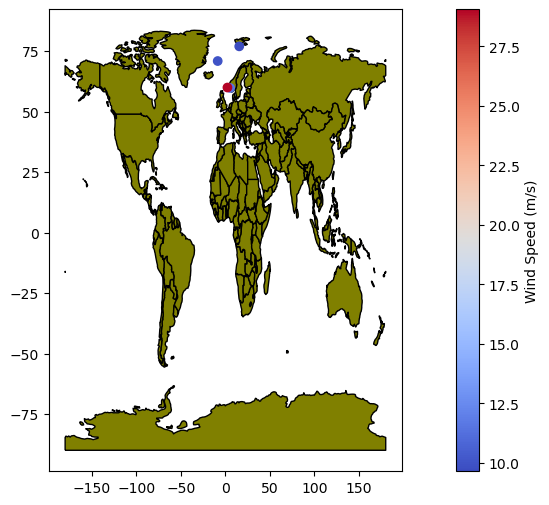

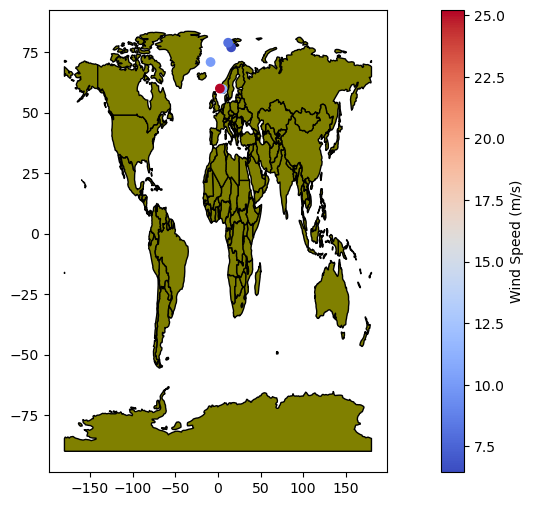

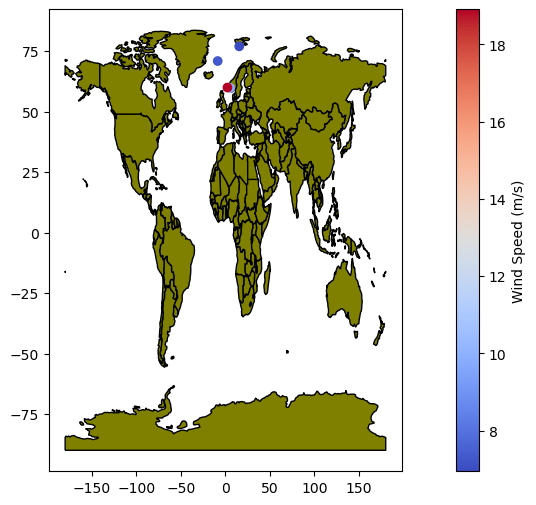

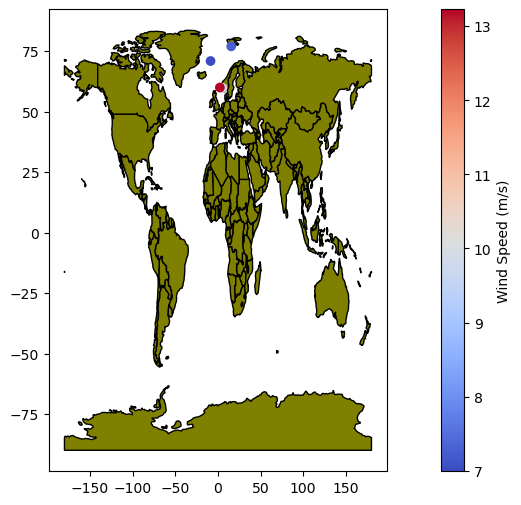

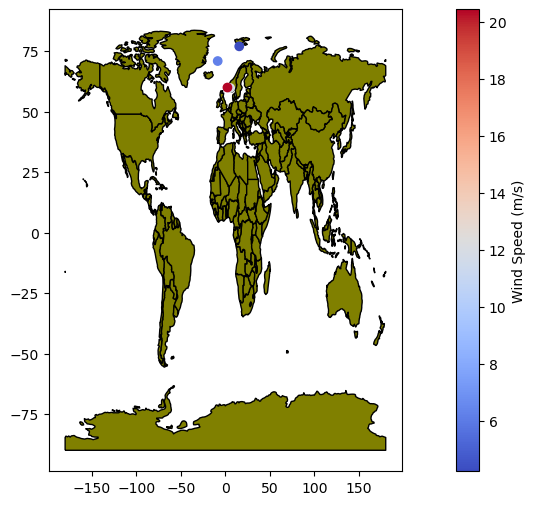

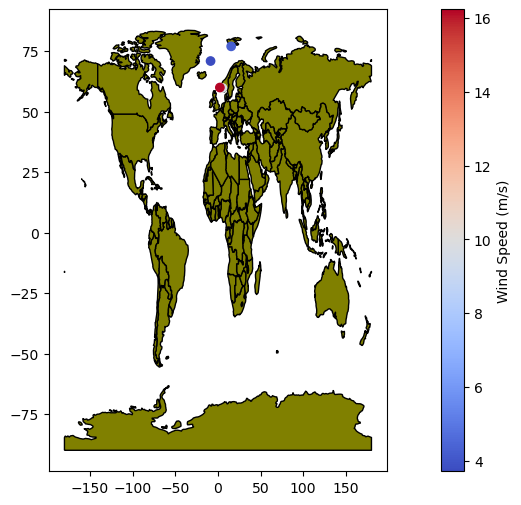

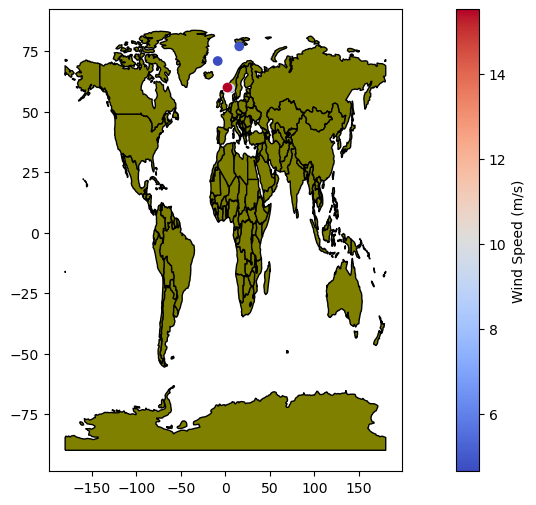

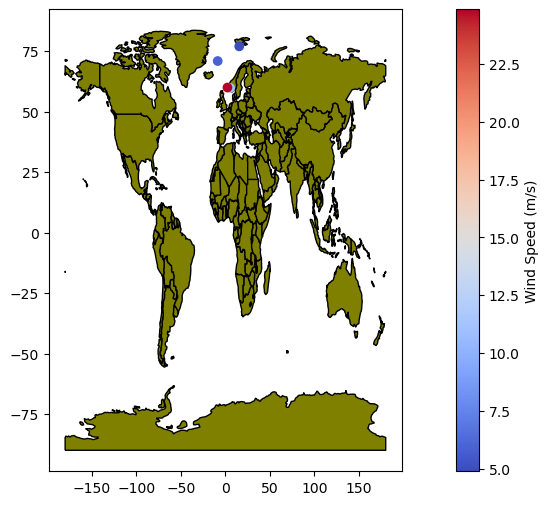

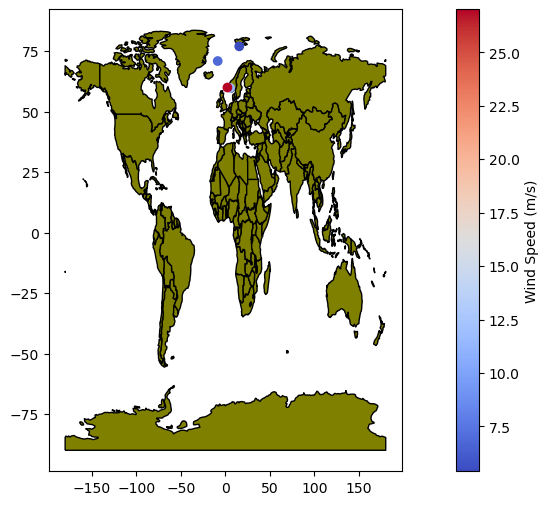

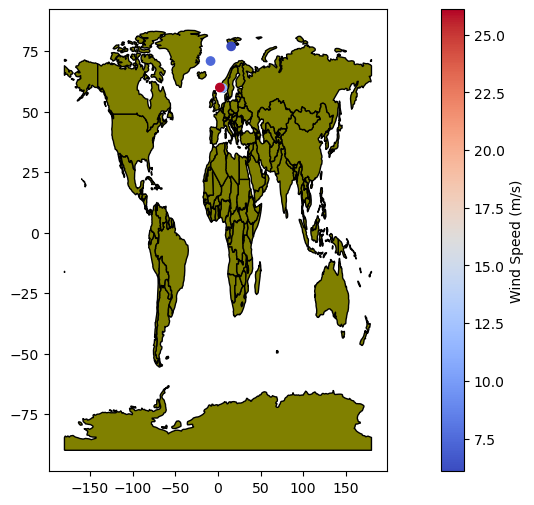

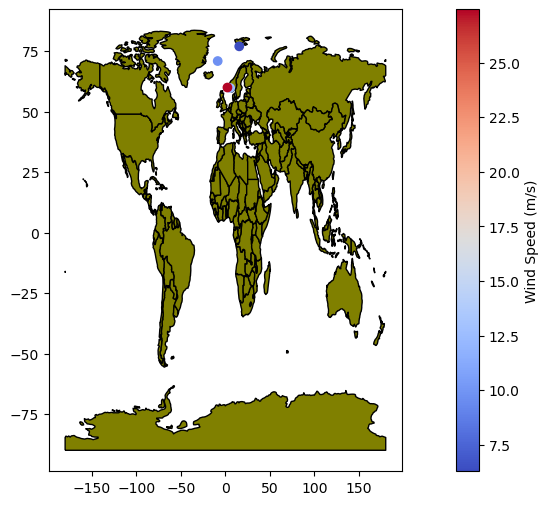

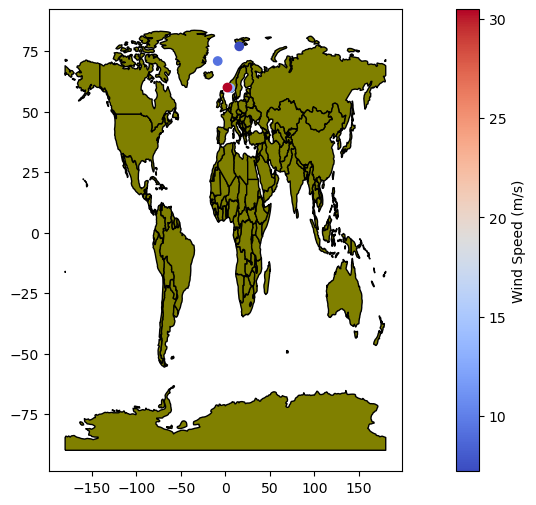

In [429]:
with beam.Pipeline() as pipeline:
    plotfigs = (
        pipeline
        | 'Create'>> beam.Create(grp_pickles)
        | 'Plot'>> beam.Map(save_figures)
    )

C:\Users\kumar\AppData\Local\Temp\ipykernel_18368\3009412480.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


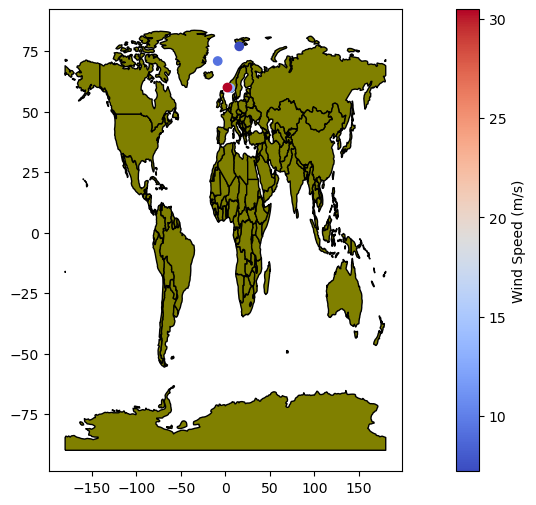

In [316]:
for name, grp in grouped:
    df = grp
    # Create a GeoDataFrame
    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
    )
    
    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
    fig, ax = plt.subplots(figsize=(14,6))  # Increase the width here
    ax = world.clip([-180, -90, 180, 90]).plot(color="olive", edgecolor="black", ax=ax)
    # We can now plot our ``GeoDataFrame``.
    gdf.plot(column='WindSpeed', ax=ax, cmap='coolwarm')
    cbar = plt.colorbar(ax.get_children()[1], ax=ax, orientation='vertical')
    cbar.set_label('Wind Speed (m/s)')
    plt.show()
    break  # Remove this if you want to plot for all groups

In [74]:
# !pip install geopandas

In [77]:
# ! pip install geodatasets

In [84]:
import geopandas
from geodatasets import get_path

In [80]:
import matplotlib.pyplot as plt

In [85]:
data = {
    'latitude': [40.7128, 34.0522, 41.8781],
    'longitude': [-74.006, -118.2437, -87.6298],
    'wind_speed': [5, 7, 4],
    'dry_bulb_temp': [20, 25, 18]
}
df = pd.DataFrame(data)

In [88]:
# Create a GeoDataFrame
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)
print(gdf.head())

   latitude  longitude  wind_speed  dry_bulb_temp                     geometry
0   40.7128   -74.0060           5             20   POINT (-74.00600 40.71280)
1   34.0522  -118.2437           7             25  POINT (-118.24370 34.05220)
2   41.8781   -87.6298           4             18   POINT (-87.62980 41.87810)


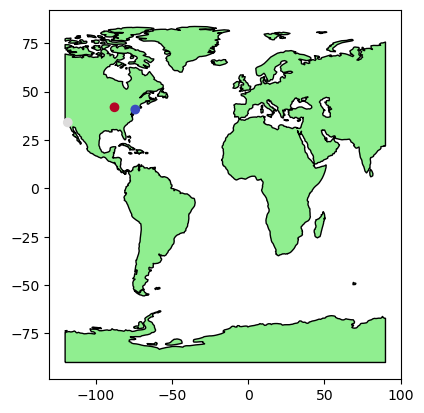

In [99]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([-120,-90,90,180]).plot(color="lightgreen", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, cmap='coolwarm')

plt.show()

In [440]:
geopandas.__version__

'0.14.3'

In [441]:
import geodatasets

In [442]:
geodatasets.__version__

'2023.12.0'

In [449]:
import matplotlib

In [450]:
matplotlib.__version__

'3.5.2'

In [451]:
os.listdir()

['.ipynb_checkpoints',
 '01001099999.pickle',
 '01001499999.pickle',
 '01001799999.pickle',
 '01003099999.pickle',
 '01004099999.pickle',
 'A02-Setup_a_Data_Engineering_Pipeline.pdf',
 'A02.ipynb',
 'csvzip.zip',
 'extracted']